In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


## Introduction

In this Notebook we will use binary classification algoithms to solve the Spaceship Titanic Challenge. 

Our goal is to predict wether a passenger is transported to an other dimension after the crash of the space titanic or not. 



![spaceship](https://qph.cf2.quoracdn.net/main-qimg-c8dabaf5c8e26b056f1eda7728c1d002-lq)

## The Dataset

* **Train Data:**
    * **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    * **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
    * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    * **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    * **Destination** - The planet the passenger will be debarking to.
    * **Age** - The age of the passenger.
    * **VIP** - Whether the passenger has paid for special VIP service during the voyage.
    * **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    * **Name** - The first and last names of the passenger.
    * **Transported **- Whether the passenger was transported to another dimension. This is the target, the column we are trying to predict.
    
    
* **Test Data:**
    * Personal records for the remaining one-third (~4300) of the passengers, to be used as test data.

## 1. Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

## 2. Loading the Data 

In [3]:
train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')

print('The Training Set has:',train.shape[0] ,'rows and' ,train.shape[1] ,'columns')
print('The Test Set has:',test.shape[0],'rows and',test.shape[1],'columns')

The Training Set has: 8693 rows and 14 columns
The Test Set has: 4277 rows and 13 columns


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 3. Checking the state of the Data for later cleaning 

### Missing values

In [5]:
print('The train dataset has', sum(train.isnull().sum()), 'missing values')
print('The test dataset has', sum(test.isnull().sum()), 'missing values')

The train dataset has 2324 missing values
The test dataset has 1117 missing values


### Distribution of the missing values

We can see that every feature except for the Passenger ID contains null values.

In [6]:
print('Training Set:')
print(train.isnull().sum())
print('')
print('Test Set:')
print(test.isnull().sum())

Training Set:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Test Set:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


### Unique Values in every column

In [7]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

### Data Types
All Data needs to be transformed into numeric values for later model building

In [8]:
print(train.dtypes)

# Saving the object features as a list 
obj = train.select_dtypes(['object']).columns

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


## Checking the distribution of our target feature ('Transported') to see if we have to change our sampling 

<AxesSubplot:xlabel='Transported', ylabel='count'>

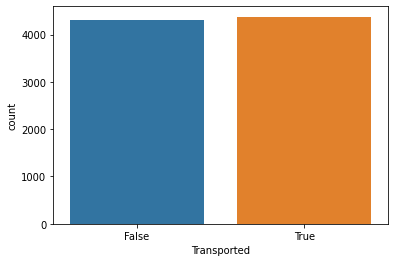

In [9]:
sns.countplot(data = train, x = "Transported")